https://icasas101.github.io/FinalDSTutorial/ <<<<< This is the link to our website!

# Identifying Bias in the NOPD

By Josh Kellner and Isabella Casas

CMPS 3160 - Introduction to Data Science - Professor Mattei

## Introduction

### Background

The issue of police brutality against black people in our country has, of course, been as widely discussed as ever over the last year because of the widespread abundance protests against it all over the country. This issue has by no means only been brought up around this time when many people are reckoning with it, but the ability of social media to spread information and set trends so quickly has given the issue a major spotlight. 

Some of the questions we would like to answer are as follows:
1. Are police more likely to question, search, and/or take more severe actions against people of color?
2. Could gender have an effect on how likely someone is to be questioned/searched?
3. Could police be biased against people of certain classes?

In an ideal situation, any unfair biases that are discovered by this project will be used to determine a change in or create policy that would correct these unethical discriminatory actions and prompt city officials to put that policy in place. At the moment, we are focusing on New Orleans but a possible expansion, given that the datasets would be accessible, could be to compare the conclusions that we draw to conclusions drawn from other cities’ data.

### About our dataset

Link to dataset: https://data.nola.gov/Public-Safety-and-Preparedness/Stop-and-Search-Field-Interviews-/kitu-f4uy/data

For our Final Tutorial, we have partnered up to analyze a dataset called “Stop and Search (Field Interviews).” It is filled with data regarding instances of people being questioned by the New Orleans Police Department. Some of the information about these interviews includes when and where it happened, the officer conducting the questioning and potential search, a description of the individual being searched including age, gender, race, height and weight, the reason the interview was conducted, actions taken, etc. We plan to analyze this information in such a way that one can use our analysis to learn about any biases that NOPD has, or a lack thereof, and how these biases manifest themselves. We expect to specifically look at relationships between frequencies of interviews and searches and descriptors of the subjects of these interviews and searches as well as the relationships between the severity of the actions taken by the police and the descriptors of the subjects. The dataset provides information about the car that the subject was driving, if they were driving one, which will be another variable that can shed light on biases.

### Collaboration plan

In terms of a collaboration plan, we have a Github repository set up to keep track of our most up to date work as well as each update. Every two weeks we plan to meet on Zoom to divide specific chunks of work to be done. In these meetings we will review the work we have done since the last meeting and work through things that we couldn’t complete individually, together. 

## Data ETL

### Extraction

Our first step was to import our necessary libaries and then download the data files.

In [2]:
import pandas as pd
import numpy as np

In [3]:
!head ../FinalDSTutorial/Stop_and_Search__Field_Interviews_.csv
!head ../FinalDSTutorial/Neighborhood profiles data tables.xlsx

'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.


### Load

This dataset will contain information regarding the genders of people living in New Orleans from 2000 and 2014-2018.

In [4]:
gender_df = pd.read_excel("../FinalDSTutorial/Neighborhood profiles data tables.xlsx",
                          sheet_name='Table 2',
                          names=['Location', 'Female2000', 'Female2014-2018', 'FemaleMOE', 'Blank', 'Male2000', 'Male2014-2018', 'MaleMOE'],
                          header=None)
gender_df = gender_df.dropna(how='all')
gender_df = gender_df.drop([6, 8, 10, 11])
gender_df = gender_df.set_index('Location')
gender_df = gender_df.replace('NaN%', np.nan)
gender_df = gender_df.astype({'Female2000': 'float64', 'Female2014-2018': 'float64', 'FemaleMOE': 'float64'})
display(gender_df)
display(gender_df.dtypes)

,Female2000,Female2014-2018,FemaleMOE,Blank,Male2000,Male2014-2018,MaleMOE
Location,,,,,,,
Algiers Point,0.520,0.503,0.049,NaN,0.480,0.497,0.033
Audubon,0.530,0.534,0.022,NaN,0.470,0.466,0.017
B.W. Cooper,0.604,0.515,0.048,NaN,0.396,0.485,0.063
Bayou St. John,0.532,0.525,0.030,NaN,0.468,0.475,0.041
Behrman,0.539,0.582,0.028,NaN,0.461,0.418,0.036
...,...,...,...,...,...,...,...
West Lake Forest,0.551,0.537,0.023,NaN,0.449,0.463,0.044
West Riverside,0.535,0.518,0.029,NaN,0.465,0.482,0.037
Whitney,0.545,0.518,0.034,NaN,0.455,0.482,0.128


Female2000         float64
Female2014-2018    float64
FemaleMOE          float64
Blank              float64
Male2000           float64
Male2014-2018      float64
MaleMOE            float64
dtype: object

This dataset contains information regarding the racial makeup of each neighborhood of New Orleans.

In [5]:
race_df = pd.read_excel("../FinalDSTutorial/Neighborhood profiles data tables.xlsx",
                          sheet_name='Table 4',
                          names=['Location', 'Black2000', 'Black2014-2018', 'BlackMOE', 'Blank1', 'White2000', 'White2014-2018', 'WhiteMOE', 'Blank2', 'Asian2000', 'Asian2014-2018', 'AsianMOE', 'Blank3', 'AmerIndian2000', 'AmerIndian2014-2018', 'AmerIndianMOE', 'Blank4', 'Biracial2000', 'Biracial2014-2018', 'BiracialMOE', 'Blank5', 'Hispanic2000', 'Hispanic 2013-2017', 'HispanicMOE', 'Blank6', 'Other2000', 'Other2013-2017', 'OtherMOE'],
                          header=None)
race_df = race_df.dropna(how='all')
race_df = race_df.drop([6, 8, 10, 11])
race_df = race_df.drop(columns=['Blank1', 'Blank2', 'Blank3', 'Blank4', 'Blank5', 'Blank6'])
race_df = race_df.set_index('Location')
race_df = race_df.replace('NaN%', np.nan)
display(race_df)
display(race_df.dtypes)

,Black2000,Black2014-2018,BlackMOE,White2000,White2014-2018,WhiteMOE,Asian2000,Asian2014-2018,AsianMOE,AmerIndian2000,...,AmerIndianMOE,Biracial2000,Biracial2014-2018,BiracialMOE,Hispanic2000,Hispanic 2013-2017,HispanicMOE,Other2000,Other2013-2017,OtherMOE
Location,,,,,,,,,,,,,,,,,,,,,
Algiers Point,0.251,0.086,0.044,0.674,0.816,0.030,0.008,0.003,0.005,0.005,...,0.004,0.010,0.005,0.008,0.047,0.090,0.047,0.005,0.000,0.006
Audubon,0.051,0.071,0.015,0.861,0.736,0.013,0.024,0.055,0.011,0.002,...,0.002,0.015,0.035,0.011,0.044,0.100,0.026,0.003,0.003,0.003
B.W. Cooper,0.984,0.974,0.041,0.002,0.000,0.012,0.000,0.000,0.012,0.000,...,0.012,0.004,0.015,0.014,0.009,0.008,0.013,0.001,0.004,0.014
Bayou St. John,0.678,0.370,0.092,0.267,0.537,0.021,0.009,0.003,0.003,0.004,...,0.004,0.008,0.004,0.004,0.032,0.083,0.036,0.002,0.003,0.005
Behrman,0.774,0.783,0.051,0.128,0.114,0.041,0.016,0.003,0.003,0.002,...,0.003,0.012,0.012,0.013,0.066,0.087,0.039,0.002,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Lake Forest,0.954,0.921,0.017,0.020,0.003,0.003,0.004,0.000,0.004,0.002,...,0.004,0.007,0.014,0.009,0.013,0.053,0.029,0.001,0.009,0.013
West Riverside,0.361,0.204,0.052,0.569,0.730,0.024,0.007,0.011,0.007,0.004,...,0.004,0.014,0.010,0.005,0.042,0.039,0.015,0.003,0.004,0.008
Whitney,0.849,0.786,0.097,0.111,0.168,0.044,0.005,0.022,0.014,0.002,...,0.006,0.009,0.007,0.008,0.023,0.005,0.009,0.000,0.012,0.022


Black2000              float64
Black2014-2018         float64
BlackMOE               float64
White2000              float64
White2014-2018         float64
WhiteMOE               float64
Asian2000              float64
Asian2014-2018         float64
AsianMOE               float64
AmerIndian2000         float64
AmerIndian2014-2018    float64
AmerIndianMOE          float64
Biracial2000           float64
Biracial2014-2018      float64
BiracialMOE            float64
Hispanic2000           float64
Hispanic 2013-2017     float64
HispanicMOE            float64
Other2000              float64
Other2013-2017         float64
OtherMOE               float64
dtype: object

This dataset includes information regarding individuals who were stopped by the NOPD. 

In [6]:
df = pd.read_csv("../FinalDSTutorial/Stop_and_Search__Field_Interviews_.csv", dtype={'FieldInterviewID': int})
df.head()
display(df.dtypes)

C:\Users\Isabe\Documents\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


FieldInterviewID           int32
NOPD_Item                 object
EventDate                 object
District                   int64
Zone                      object
OfficerAssignment         object
StopDescription           object
ActionsTaken              object
VehicleYear              float64
VehicleMake               object
VehicleModel              object
VehicleStyle              object
VehicleColor              object
SubjectID                float64
SubjectRace               object
SubjectGender             object
SubjectAge               float64
SubjectHasPhotoID         object
SubjectHeight            float64
SubjectWeight            float64
SubjectEyeColor           object
SubjectHairColor          object
SubjectDriverLicState     object
CreatedDateTime           object
LastModifiedDateTime      object
Longitude                float64
Latitude                 float64
Zip                      float64
BlockAddress              object
dtype: object

### Transform

As you can see, our original dataframe had some messy information, so our next step was to clean it up. First, we dropped any columns that were not necessary for our analysis.

In [7]:
dropped_df = df.drop(columns=['NOPD_Item', 'VehicleYear', 'VehicleMake', 'VehicleModel', 'VehicleStyle', 'VehicleColor', 'SubjectWeight', 'SubjectHeight', 'SubjectEyeColor', 'SubjectHairColor'])
dropped_df.head()

,FieldInterviewID,EventDate,District,Zone,OfficerAssignment,StopDescription,ActionsTaken,SubjectID,SubjectRace,SubjectGender,SubjectAge,SubjectHasPhotoID,SubjectDriverLicState,CreatedDateTime,LastModifiedDateTime,Longitude,Latitude,Zip,BlockAddress
0,17415,01/01/2010 01:11:00 AM,6,E,6th District,TRAFFIC VIOLATION,NaN,20465.0,BLACK,FEMALE,26.0,Yes,LA,01/01/2010 01:26:26 AM,NaN,0.0,0.0,NaN,NaN
1,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20466.0,BLACK,MALE,17.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
2,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20467.0,BLACK,MALE,18.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
3,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20468.0,BLACK,MALE,18.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
4,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20469.0,BLACK,MALE,30.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN


Next, we changed our index to be both FieldInterviewID and SubjectID in order to not have multiple FieldInterview entries, but still be able to see how many individuals were involved in a single interview. We also made sure to replace certain values with NaN.

In [8]:
df = dropped_df.set_index(['FieldInterviewID', 'SubjectID'])
df = df.replace('-', np.nan)
df.head()

EventDate  District Zone  \
FieldInterviewID SubjectID                                          
17415            20465.0    01/01/2010 01:11:00 AM         6    E   
17416            20466.0    01/01/2010 02:06:00 AM         5    D   
                 20467.0    01/01/2010 02:06:00 AM         5    D   
                 20468.0    01/01/2010 02:06:00 AM         5    D   
                 20469.0    01/01/2010 02:06:00 AM         5    D   

                           OfficerAssignment    StopDescription ActionsTaken  \
FieldInterviewID SubjectID                                                     
17415            20465.0       6th  District  TRAFFIC VIOLATION          NaN   
17416            20466.0       5th  District   CALL FOR SERVICE          NaN   
                 20467.0       5th  District   CALL FOR SERVICE          NaN   
                 20468.0       5th  District   CALL FOR SERVICE          NaN   
                 20469.0       5th  District   CALL FOR SERVICE          NaN   

                           SubjectRace SubjectGender  SubjectAge  \
FieldInterviewID SubjectID                                         
17415            20465.0         BLACK        FEMALE        26.0   
17416            20466.0         BLACK          MALE        17.0   
                 20467.0         BLACK          MALE        18.0   
                 20468.0         BLACK          MALE        18.0   
                 20469.0         BLACK          MALE        30.0   

                           SubjectHasPhotoID SubjectDriverLicState  \
FieldInterviewID SubjectID                                           
17415            20465.0                 Yes                    LA   
17416            20466.0                  No                   NaN   
                 20467.0                  No                   NaN   
                 20468.0                  No                   NaN   
                 20469.0                  No                   NaN   

                                   CreatedDateTime LastModifiedDateTime  \
FieldInterviewID SubjectID                                                
17415            20465.0    01/01/2010 01:26:26 AM                  NaN   
17416            20466.0    01/01/2010 02:27:38 AM                  NaN   
                 20467.0    01/01/2010 02:27:38 AM                  NaN   
                 20468.0    01/01/2010 02:27:38 AM                  NaN   
                 20469.0    01/01/2010 02:27:38 AM                  NaN   

                            Longitude  Latitude  Zip BlockAddress  
FieldInterviewID SubjectID                                         
17415            20465.0          0.0       0.0  NaN          NaN  
17416            20466.0          0.0       0.0  NaN          NaN  
                 20467.0          0.0       0.0  NaN          NaN  
                 20468.0          0.0       0.0  NaN          NaN  
                 20469.0          0.0       0.0  NaN          NaN

Now we begin some analysis. First, we are going to see what are the most common actions taken against people of a certain race. To begin, we count the occasions when no actions were taken against each race.

In [9]:
# create list of unique actions
actionsLst = df.ActionsTaken.unique()

In [10]:
df['SubjectGender'] = df['SubjectGender'].fillna('UNKNOWN')

In [11]:
df.SubjectGender.unique()

array(['FEMALE', 'MALE', 'UNKNOWN'], dtype=object)

In [12]:
# making sure the terms they use are uniform throughout. It seems like they are.
count1 = 0
count2 = 0
count3 = 0
count4 = 0

for i in actionsLst:
    if (type(i) is str):
        if ('Stop Results: No action taken' in i):
            count1 += 1
        elif ('Stop Results: no action taken' in i):
            count2 += 1
        elif ('Stop Results: No Action Taken' in i):
            count3 += 1
        elif ('Stop Results: No Action taken' in i):
            count4 += 1
    
        

amerCount = df['SubjectRace'].value_counts()["AMER. IND."]
asianCount = df['SubjectRace'].value_counts()["ASIAN"]
blackCount = df['SubjectRace'].value_counts()["BLACK"]
hispanicCount = df['SubjectRace'].value_counts()["HISPANIC"]
whiteCount = df['SubjectRace'].value_counts()["WHITE"]
maleCount = df['SubjectGender'].value_counts()["MALE"]
femaleCount = df['SubjectGender'].value_counts()["FEMALE"]
unknownCount = df['SubjectGender'].value_counts()["UNKNOWN"]

noActionAmer = noActionAsian = noActionBlack = noActionHispanic = noActionWhite = 0

nanActionAmer = nanActionAsian = nanActionBlack = nanActionHispanic = nanActionWhite = 0

The following cells turn the ActionsTaken column into multiple columns that each represent a single action, so we can create visualizations easier. The visualizations also included actions taken per gender.

In [13]:
numRows = len(df.index)
actionCategories = []
temp = ""
semiBool = True
for i in actionsLst:
    if (type(i) is str):
        semiBool = True
        for j in i:
            
            if (semiBool == True):
                if(j != ":"):
                    temp += j
                else:
                    semiBool = False
                    if (temp not in actionCategories):
                        actionCategories.append(temp)
                    temp = ""
            elif (j == ";"):
                semiBool = True

In [14]:
temp1 = []

for i in range(numRows):
    temp1.append(0)

stopResultsLst = []
subjectTypeLst = []
searchOccurredLst = []
searchTypesLst = []
legalBasisesLst = []
evidenceSeizedLst = []
evidenceTypesLst = []
consentToSearchLst = []
exitVehicleLst = []
searchTypePatDownLst = []
consentFormCompletedLst = []
consentGivenLst = []
stripBodyCavitySearchLst = []
typeOfSearchLst = []
typeOfSearchSupervisorApprovalLst = []

emptyLst = ["-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-"]

for index, row in df.iterrows():
    tempLst = emptyLst
    if (type(row["ActionsTaken"]) is str):
        list1 = row["ActionsTaken"].split(':')

        list2 = []

        for i in list1:
            temp = i.split(';')
            for j in temp:
                if (j[0] == ' '):
                    list2.append(j[1:])
                else:
                    list2.append(j)
        for i in (range(len(list2))):
            if (list2[i] in actionCategories):
                if (list2[i] == 'Stop Results'):
                    tempLst[0] = list2[i + 1]
                elif (list2[i] == 'Subject Type'):
                    tempLst[1] = list2[i + 1]
                elif (list2[i] == 'Search Occurred'):
                    tempLst[2] = list2[i + 1]
                elif (list2[i] == 'Search Types'):
                    tempLst[3] = list2[i + 1]
                elif (list2[i] == 'Legal Basises'):
                    tempLst[4] = list2[i + 1]
                elif (list2[i] == 'Evidence Seized'):
                    tempLst[5] = list2[i + 1]
                elif (list2[i] == 'Evidence Types'):
                    tempLst[6] = list2[i + 1]
                elif (list2[i] == 'Consent To Search'):
                    tempLst[7] = list2[i + 1]
                elif (list2[i] == 'Exit Vehicle'):
                    tempLst[8] = list2[i + 1]
                elif (list2[i] == 'Search Type Pat Down'):
                    tempLst[9] = list2[i + 1]
                elif (list2[i] == 'Consent Form Completed'):
                    tempLst[10] = list2[i + 1]
                elif (list2[i] == 'StripBody Cavity Search'):
                    tempLst[11] = list2[i + 1]
                elif (list2[i] == 'Consent Given'):
                    tempLst[12] = list2[i + 1]
                elif (list2[i] == 'Type of Search'):
                    tempLst[13] = list2[i + 1]
                elif (list2[i] == 'Type of Search Supervisor Approval'):
                    tempLst[14] = list2[i + 1]

                    
                    
    stopResultsLst.append(tempLst[0])
    subjectTypeLst.append(tempLst[1])
    searchOccurredLst.append(tempLst[2])
    searchTypesLst.append(tempLst[3])
    legalBasisesLst.append(tempLst[4])
    evidenceSeizedLst.append(tempLst[5])
    evidenceTypesLst.append(tempLst[6])
    consentToSearchLst.append(tempLst[7])
    exitVehicleLst.append(tempLst[8])
    searchTypePatDownLst.append(tempLst[9])
    consentFormCompletedLst.append(tempLst[10])
    stripBodyCavitySearchLst.append(tempLst[11])
    consentGivenLst.append(tempLst[12])
    typeOfSearchLst.append(tempLst[13])
    typeOfSearchSupervisorApprovalLst.append(tempLst[14])

                
df['StopResults'] = stopResultsLst
df['SubjectType'] = subjectTypeLst
df['SearchOccurred'] = searchOccurredLst
df['SearchTypes'] = searchTypesLst
df['LegalBasises'] = legalBasisesLst
df['EvidenceSeized'] = evidenceSeizedLst
df['EvidenceTypes'] = evidenceTypesLst
df['ConsentToSearch'] = consentToSearchLst
df['ExitVehicle'] = exitVehicleLst
df['SearchTypePatDown'] = searchTypePatDownLst
df['ConsentFormCompleted'] = consentFormCompletedLst
df['StripBodyCavitySearch'] = stripBodyCavitySearchLst
df['ConsentGiven'] = consentGivenLst
df['TypeOfSearch'] = typeOfSearchLst
df['TypeOfSearchSupervisorApproval'] = typeOfSearchSupervisorApprovalLst

The following bar graphs use a simple count to allow us to visualize how frequently each type of action occurs per race. Further analysis is required to determine whether some races unfairly face more severe punishments or not.

Here we see no actions by race and gender.

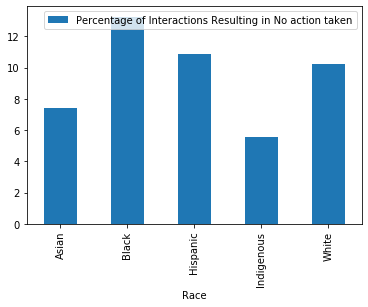

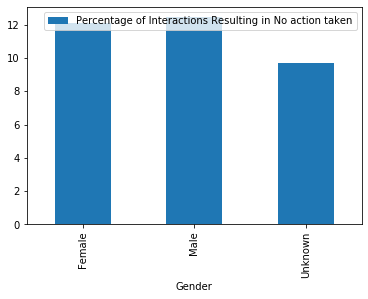

In [15]:
noAmer = noAsian = noBlack = noHispanic = noWhite = noFemale = noMale = noUnknown = 0

for index, row in df.iterrows():
    if (row["StopResults"] == "No action taken"):
        if (row['SubjectRace'] == "AMER. IND."):
            noAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            noAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            noBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            noHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            noWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            noFemale += 1
        if (row['SubjectGender'] == "MALE"):
            noMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            noUnknown += 1
            
noAmerPer = (noAmer / amerCount) * 100
noAsianPer = (noAsian / asianCount) * 100
noBlackPer = (noBlack / blackCount) * 100
noHispanicPer = (noHispanic / hispanicCount) * 100
noWhitePer = (noWhite / whiteCount) * 100

noFemalePer = (noFemale / femaleCount) * 100
noMalePer = (noMale / maleCount) * 100
noUnknownPer = (noUnknown / unknownCount) * 100

noPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in No action taken": [noAsianPer, noBlackPer, noHispanicPer, noAmerPer, noWhitePer]}
noPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in No action taken": [noFemalePer, noMalePer, noUnknownPer]}

noRaceDf = pd.DataFrame(noPerDict).set_index('Race')
noGenderDf = pd.DataFrame(noPerDictGender).set_index('Gender')


noRaceDf.plot.bar()
noGenderDf.plot.bar()

This graph shows the percentage of interactions that did not have a specified result.

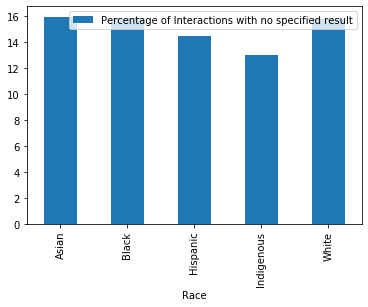

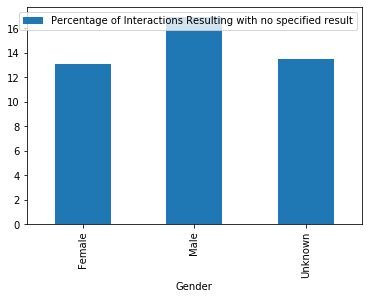

In [35]:
nanAmer = nanAsian = nanBlack = nanHispanic = nanWhite = nanFemale = nanMale = nanUnknown = 0

for index, row in df.iterrows():
    if ((row["StopResults"] == "-")):
        if (row['SubjectRace'] == "AMER. IND."):
            nanAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            nanAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            nanBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            nanHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            nanWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            nanFemale += 1
        if (row['SubjectGender'] == "MALE"):
            nanMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            nanUnknown += 1
            
            
nanAmerPer = (nanAmer / amerCount) * 100
nanAsianPer = (nanAsian / asianCount) * 100
nanBlackPer = (nanBlack / blackCount) * 100
nanHispanicPer = (nanHispanic / hispanicCount) * 100
nanWhitePer = (nanWhite / whiteCount) * 100

nanFemalePer = (nanFemale / femaleCount) * 100
nanMalePer = (nanMale / maleCount) * 100
nanUnknownPer = (nanUnknown / unknownCount) * 100

nanPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions with no specified result": [nanAsianPer, nanBlackPer, nanHispanicPer, nanAmerPer, nanWhitePer]}
nanPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting with no specified result": [nanFemalePer, nanMalePer, nanUnknownPer]}

nanRaceDf = pd.DataFrame(nanPerDict).set_index('Race')
nanGenderDf = pd.DataFrame(nanPerDictGender).set_index('Gender')


nanRaceDf.plot.bar()
nanGenderDf.plot.bar()

Here we can see who received verbal warnings.

In [ ]:
verbalWarningAmer = verbalWarningAsian = verbalWarningBlack = verbalWarningHispanic = verbalWarningWhite = verbalWarningFemale = verbalWarningMale = verbalWarningUnknown = 0

for index, row in df.iterrows():
    if (row["StopResults"] == "Verbal Warning"):
        if (row['SubjectRace'] == "AMER. IND."):
            verbalWarningAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            verbalWarningAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            verbalWarningBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            verbalWarningHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            verbalWarningWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            verbalWarningFemale += 1
        if (row['SubjectGender'] == "MALE"):
            verbalWarningMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            verbalWarningUnknown += 1
            
verbalWarningAmerPer = (verbalWarningAmer / amerCount) * 100
verbalWarningAsianPer = (verbalWarningAsian / asianCount) * 100
verbalWarningBlackPer = (verbalWarningBlack / blackCount) * 100
verbalWarningHispanicPer = (verbalWarningHispanic / hispanicCount) * 100
verbalWarningWhitePer = (verbalWarningWhite / whiteCount) * 100

verbalWarningFemalePer = (verbalWarningFemale / femaleCount) * 100
verbalWarningMalePer = (verbalWarningMale / maleCount) * 100
verbalWarningUnknownPer = (verbalWarningUnknown / unknownCount) * 100

verbalWarningPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in Verbal Warnings": [verbalWarningAsianPer, verbalWarningBlackPer, verbalWarningHispanicPer, verbalWarningAmerPer, verbalWarningWhitePer]}
verbalWarningPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in Verbal Warnings": [verbalWarningFemalePer, verbalWarningMalePer, verbalWarningUnknownPer]}

verbalWarningRaceDf = pd.DataFrame(verbalWarningPerDict).set_index('Race')
verbalWarningGenderDf = pd.DataFrame(verbalWarningPerDictGender).set_index('Gender')


verbalWarningRaceDf.plot.bar()
verbalWarningGenderDf.plot.bar()

This graph shows who received a citation.

In [ ]:
citationAmer = citationAsian = citationBlack = citationHispanic = citationWhite = citationFemale = citationMale = citationUnknown = 0

for index, row in df.iterrows():
    if (row["StopResults"] == "Citation Issued"):
        if (row['SubjectRace'] == "AMER. IND."):
            citationAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            citationAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            citationBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            citationHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            citationWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            citationFemale += 1
        if (row['SubjectGender'] == "MALE"):
            citationMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            citationUnknown += 1
            
citationAmerPer = (citationAmer / amerCount) * 100
citationAsianPer = (citationAsian / asianCount) * 100
citationBlackPer = (citationBlack / blackCount) * 100
citationHispanicPer = (citationHispanic / hispanicCount) * 100
citationWhitePer = (citationWhite / whiteCount) * 100

citationFemalePer = (citationFemale / femaleCount) * 100
citationMalePer = (citationMale / maleCount) * 100
citationUnknownPer = (citationUnknown / unknownCount) * 100

citationPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in Citations Issued": [citationAsianPer, citationBlackPer, citationHispanicPer, citationAmerPer, citationWhitePer]}
citationPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in Citations Issued": [citationFemalePer, citationMalePer, citationUnknownPer]}

citationRaceDf = pd.DataFrame(citationPerDict).set_index('Race')
citationGenderDf = pd.DataFrame(citationPerDictGender).set_index('Gender')


citationRaceDf.plot.bar()
citationGenderDf.plot.bar()

This chart shows who received a summons.

In [ ]:
summonsAmer = summonsAsian = summonsBlack = summonsHispanic = summonsWhite = summonsFemale = summonsMale = summonsUnknown = 0

for index, row in df.iterrows():
    if (row["StopResults"] == "Summons Issued"):
        if (row['SubjectRace'] == "AMER. IND."):
            summonsAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            summonsAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            summonsBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            summonsHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            summonsWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            summonsFemale += 1
        if (row['SubjectGender'] == "MALE"):
            summonsMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            summonsUnknown += 1
            
summonsAmerPer = (summonsAmer / amerCount) * 100
summonsAsianPer = (summonsAsian / asianCount) * 100
summonsBlackPer = (summonsBlack / blackCount) * 100
summonsHispanicPer = (summonsHispanic / hispanicCount) * 100
summonsWhitePer = (summonsWhite / whiteCount) * 100

summonsFemalePer = (summonsFemale / femaleCount) * 100
summonsMalePer = (summonsMale / maleCount) * 100
summonsUnknownPer = (summonsUnknown / unknownCount) * 100

summonsPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in Summons Issued": [summonsAsianPer, summonsBlackPer, summonsHispanicPer, summonsAmerPer, summonsWhitePer]}
summonsPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in Summons Issued": [summonsFemalePer, summonsMalePer, summonsUnknownPer]}

summonsRaceDf = pd.DataFrame(summonsPerDict).set_index('Race')
summonsGenderDf = pd.DataFrame(summonsPerDictGender).set_index('Gender')


summonsRaceDf.plot.bar()
summonsGenderDf.plot.bar()

This graph shows stops that resulted in L.E.A.D.

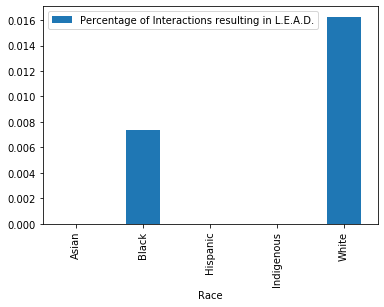

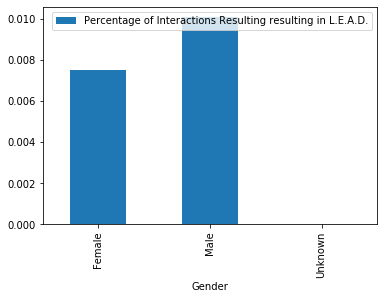

In [75]:
leadAmer = leadAsian = leadBlack = leadHispanic = leadWhite = leadFemale = leadMale = leadUnknown = 0

for index, row in df.iterrows():
    if ((row["StopResults"] == "L.E.A.D.")):
        if (row['SubjectRace'] == "AMER. IND."):
            leadAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            leadAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            leadBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            leadHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            leadWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            leadFemale += 1
        if (row['SubjectGender'] == "MALE"):
            leadMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            leadUnknown += 1
            
            
leadAmerPer = (leadAmer / amerCount) * 100
leadAsianPer = (leadAsian / asianCount) * 100
leadBlackPer = (leadBlack / blackCount) * 100
leadHispanicPer = (leadHispanic / hispanicCount) * 100
leadWhitePer = (leadWhite / whiteCount) * 100

leadFemalePer = (leadFemale / femaleCount) * 100
leadMalePer = (leadMale / maleCount) * 100
leadUnknownPer = (leadUnknown / unknownCount) * 100

leadPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions resulting in L.E.A.D.": [leadAsianPer, leadBlackPer, leadHispanicPer, leadAmerPer, leadWhitePer]}
leadPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting resulting in L.E.A.D.": [leadFemalePer, leadMalePer, leadUnknownPer]}

leadRaceDf = pd.DataFrame(leadPerDict).set_index('Race')
leadGenderDf = pd.DataFrame(leadPerDictGender).set_index('Gender')


leadRaceDf.plot.bar()
leadGenderDf.plot.bar()

This graph shows what stops resulted in searches.

In [ ]:
searchAmer = searchAsian = searchBlack = searchHispanic = searchWhite = searchFemale = searchMale = searchUnknown = 0

for index, row in df.iterrows():
    if ((row["SearchTypes"] == "-")):
        if (row['SubjectRace'] == "AMER. IND."):
            searchAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            searchAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            searchBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            searchHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            searchWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            searchFemale += 1
        if (row['SubjectGender'] == "MALE"):
            searchMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            searchUnknown += 1
            
            
searchAmerPer = ((searchAmer / amerCount) * 100)
searchAsianPer = ((searchAsian / asianCount) * 100)
searchBlackPer = ((searchBlack / blackCount) * 100)
searchHispanicPer = ((searchHispanic / hispanicCount) * 100)
searchWhitePer = ((searchWhite / whiteCount) * 100)

searchFemalePer = (100 - (searchFemale / femaleCount) * 100)
searchMalePer = (100 - (searchMale / maleCount) * 100)
searchUnknownPer = (100 - (searchUnknown / unknownCount) * 100)

searchPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions resulting in some type of search": [searchAsianPer, searchBlackPer, searchHispanicPer, searchAmerPer, searchWhitePer]}
searchPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting resulting in some type of search": [searchFemalePer, searchMalePer, searchUnknownPer]}

searchRaceDf = pd.DataFrame(searchPerDict).set_index('Race')
searchGenderDf = pd.DataFrame(searchPerDictGender).set_index('Gender')


searchRaceDf.plot.bar()
searchGenderDf.plot.bar()

And finally, this chart shows who got arrested.

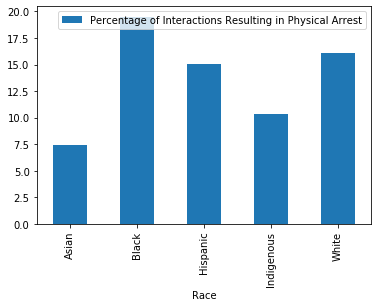

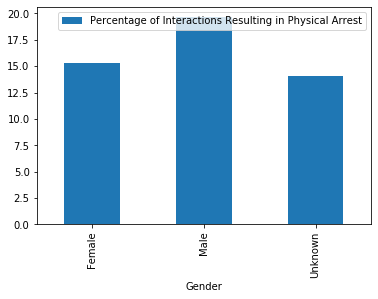

In [22]:
arrestAmer = arrestAsian = arrestBlack = arrestHispanic = arrestWhite = arrestFemale = arrestMale = arrestUnknown = 0

for index, row in df.iterrows():
    if (row["StopResults"] == "Physical Arrest"):
        if (row['SubjectRace'] == "AMER. IND."):
            arrestAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            arrestAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            arrestBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            arrestHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            arrestWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            arrestFemale += 1
        if (row['SubjectGender'] == "MALE"):
            arrestMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            arrestUnknown += 1
            
arrestAmerPer = (arrestAmer / amerCount) * 100
arrestAsianPer = (arrestAsian / asianCount) * 100
arrestBlackPer = (arrestBlack / blackCount) * 100
arrestHispanicPer = (arrestHispanic / hispanicCount) * 100
arrestWhitePer = (arrestWhite / whiteCount) * 100

arrestFemalePer = (arrestFemale / femaleCount) * 100
arrestMalePer = (arrestMale / maleCount) * 100
arrestUnknownPer = (arrestUnknown / unknownCount) * 100

arrestPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in Physical Arrest": [arrestAsianPer, arrestBlackPer, arrestHispanicPer, arrestAmerPer, arrestWhitePer]}
arrestPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in Physical Arrest": [arrestFemalePer, arrestMalePer, arrestUnknownPer]}

arrestRaceDf = pd.DataFrame(arrestPerDict).set_index('Race')
arrestGenderDf = pd.DataFrame(arrestPerDictGender).set_index('Gender')


arrestRaceDf.plot.bar()
arrestGenderDf.plot.bar()

In [58]:
trafficDf = df
for index, row in trafficDf.iterrows():
    if (row["StopDescription"] != "TRAFFIC VIOLATION"):
        trafficDf = trafficDf.drop(index)
    
trafficDf.head()

KeyboardInterrupt: 

In [ ]:
trafficSearchAmer = trafficSearchAsian = trafficSearchBlack = trafficSearchHispanic = trafficSearchWhite = trafficSearchFemale = trafficSearchMale = trafficSearchUnknown = 0

for index, row in df.iterrows():
    if ((row["SearchTypes"] == "-")):
        if (row['SubjectRace'] == "AMER. IND."):
            trafficSearchAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            trafficSearchAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            trafficSearchBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            trafficSearchHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            trafficSearchWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            trafficSearchFemale += 1
        if (row['SubjectGender'] == "MALE"):
            trafficSearchMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            trafficSearchUnknown += 1
            
            
trafficSearchAmerPer = ((trafficSearchAmer / amerCount) * 100)
trafficSearchAsianPer = ((trafficSearchAsian / asianCount) * 100)
trafficSearchBlackPer = ((trafficSearchBlack / blackCount) * 100)
trafficSearchHispanicPer = ((trafficSearchHispanic / hispanicCount) * 100)
trafficSearchWhitePer = ((trafficSearchWhite / whiteCount) * 100)

trafficSearchFemalePer = (100 - (trafficSearchFemale / femaleCount) * 100)
trafficSearchMalePer = (100 - (trafficSearchMale / maleCount) * 100)
trafficSearchUnknownPer = (100 - (trafficSearchUnknown / unknownCount) * 100)

trafficSearchPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions resulting in some type of search": [trafficSearchAsianPer, trafficSearchBlackPer, trafficSearchHispanicPer, trafficSearchAmerPer, trafficSearchWhitePer]}
trafficSearchPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting resulting in some type of search": [trafficSearchFemalePer, trafficSearchMalePer, trafficSearchUnknownPer]}

trafficSearchRaceDf = pd.DataFrame(trafficSearchPerDict).set_index('Race')
trafficSearchGenderDf = pd.DataFrame(trafficSearchPerDictGender).set_index('Gender')


trafficSearchRaceDf.plot.bar()
trafficSearchGenderDf.plot.bar()

Unfortunately for many of these analyses, we do not have great data regarding gender because there are high amounts of "unknown" genders recorded. We also cannot yet conclusively declare whether some races are targeted unfairly until we have demographic information for New Orleans which will tell us what proportions of races to expect to see in this city.

To prepare for our import and cleanup of demographic information, we first began work on the gender dataset. This included cleaning it up by dropping unnecessary columns and changing the dtype for some columns.

In [ ]:
gender_df = gender_df.dropna(how='all')
gender_df = gender_df.drop(columns=['Blank'])

In [ ]:
display(gender_df)
display(gender_df.dtypes)

After cleaning up this dataset a little, we moved onto more data analysis. Our first analysis was a simple test to see if we could extract any useful information based on a subject's gender. Below is a simple pie chart that shows roughly how many men vs how many women were stopped by police in total.

In [ ]:
df['SubjectGender'].value_counts().plot.pie(colors=['blue', 'pink', 'gray'])

This pie chart compares the percentage of women and men located in the city of New Orleans.

In [ ]:
NewOrleansGenders = gender_df[['Female2014-2018', 'Male2014-2018']]
display(NewOrleansGenders.loc['New Orleans'].plot.pie(y='Gender in New Orleans, 2014-2018', colors=['pink', 'blue']))

Although we can already see that males are disproportionately stopped compared to females (since if it were proportional there would be just as many, if not slightly more, females stopped by police as males), we would like to transform the data further to ensure we are comparing the two datasets fairly.

In [ ]:
import matplotlib.pyplot as plt
new_noGenderDf = noGenderDf.drop('Unknown')
NewOrleansGenders.loc['New Orleans']
#no_actions_gender_compare = pd.concat([new_noGenderDf, NewOrleansGenders.loc['New Orleans']])
#ax = no_actions_gender_compare.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Epic Graph\nAnother Line! Whoa")
#ax.legend(["Percentage of Interactions Resulting in No Action Taken", 'Percentage of Males and Females in New Orleans'])

Here we needed to clean up the race dataframe and exclude data that came from years we don't need.

In [31]:
clean_race_df = race_df.drop(columns=['Black2000', 'BlackMOE', 'White2000', 'WhiteMOE', 'Asian2000', 'AsianMOE', 'AmerIndian2000', 'AmerIndianMOE', 'Biracial2000', 'BiracialMOE', 'Hispanic2000', 'HispanicMOE', 'Other2000', 'OtherMOE'])

Now we can create a bar graph showing the total percentages of each action taken by race. The total adds up to more than 100% because some subjects had multiple actions taken on them as a result of the encounter.

,Percentage of Interactions Resulting in No action taken,Percentage of Interactions with no specified result,Percentage of Interactions Resulting in Verbal Warnings,Percentage of Interactions Resulting in Citations Issued,Percentage of Interactions Resulting in Summons Issued,Percentage of Interactions resulting in L.E.A.D.,Percentage of Interactions resulting in some type of search,Percentage of Interactions Resulting in Physical Arrest
Race,,,,,,,,
Asian,7.380074,15.982472,29.866236,38.491697,0.830258,0.000000,15.982472,7.449262
Black,13.253609,15.913364,26.409528,23.282180,1.632524,0.007364,15.913364,19.501431
Hispanic,10.868886,14.479355,23.536761,35.111500,0.986945,0.000000,14.479355,15.016553
Indigenous,5.555556,13.043478,27.053140,43.478261,0.483092,0.000000,13.043478,10.386473
White,10.250398,15.781520,27.707790,28.651781,1.486125,0.016264,15.781520,16.106123


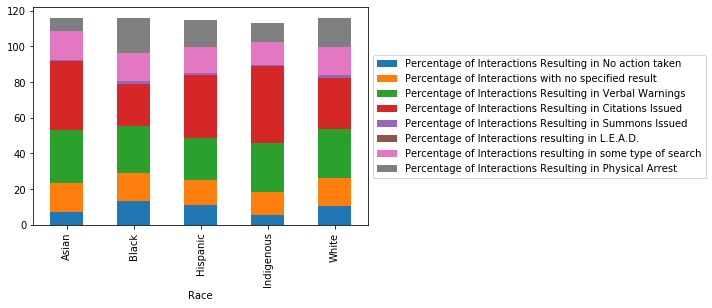

In [88]:
comp1 = pd.merge(noRaceDf, nanRaceDf, left_index=True, right_index=True)
comp2 = pd.merge(comp1, verbalWarningRaceDf, left_index=True, right_index=True)
comp3 = pd.merge(comp2, citationRaceDf, left_index=True, right_index=True)
comp4 = pd.merge(comp3, summonsRaceDf, left_index=True, right_index=True)
comp5 = pd.merge(comp4, leadRaceDf, left_index=True, right_index=True)
comp6 = pd.merge(comp5, searchRaceDf, left_index=True, right_index=True)
comp7 = pd.merge(comp6, arrestRaceDf, left_index=True, right_index=True)

display(comp7)
comp7.plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Black2014-2018         59.0
White2014-2018         30.6
Asian2014-2018          2.9
AmerIndian2014-2018     0.1
Biracial2014-2018       1.5
Hispanic 2013-2017      5.5
Other2013-2017          0.4
Name: New Orleans, dtype: float64

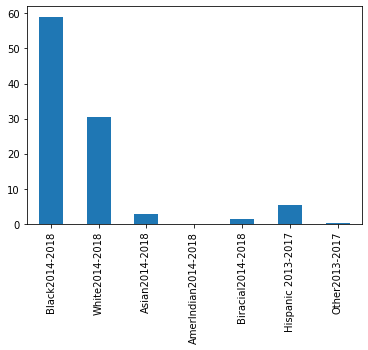

In [87]:
NOLA_race_percentage = clean_race_df.loc['New Orleans']*100
display(NOLA_race_percentage)
NOLA_race_percentage.plot.bar(x = 'Race and year')